# Python Functions for Time Series Modelling and Analysis

Functions that help in understanding time series data

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
mpl.rcParams['figure.figsize'] = (8,6)

For the explanation, let's use the bit coin index data from coindesk.com. 

In [2]:
import requests

In [3]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2018, 1 ,1)
end = datetime.date(2020, 10, 28)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2018-01-01":13412.44,"2018-01-02":14740.7563,"2018-01-03":15134.6513,"2018-01-04":15155.2263,"2018-01-05":16937.1738,"2018-01-06":17135.8363,"2018-01-07":16178.495,"2018-01-08":14970.3575,"2018-01-09":14439.4738,"2018-01-10":14890.7225,"2018-01-11":13287.26,"2018-01-12":13812.715,"2018-01-13":14188.785,"2018-01-14":13619.0288,"2018-01-15":13585.9013,"2018-01-16":11348.02,"2018-01-17":11141.2488,"2018-01-18":11250.6475,"2018-01-19":11514.925,"2018-01-20":12759.6413,"2018-01-21":11522.8588,"2018-01-22":10772.15,"2018-01-23":10839.8263,"2018-01-24":11399.52,"2018-01-25":11137.2375,"2018-01-26":11090.0638,"2018-01-27":11407.1538,"2018-01-28":11694.4675,"2018-01-29":11158.3938,"2018-01-30":10034.9975,"2018-01-31":10166.5063,"2018-02-01":9052.5763,"2018-02-02":8827.63,"2018-02-03":9224.3913,"2018-02-04":8186.6488,"2018-02-05":6914.26,"2018-02-06":7700.3863,"2018-02-07":7581.8038,"2018-02-08":8237.2363,"2018-02-09":8689.8388,"2018-02-10":8556.6125,"2018-02-11":8070.7963,"2018-02-12

In [4]:
# Grabbing only the date and bpi column 
data = pd.read_json(result.content).iloc[:,:1]

In [5]:
print(data.head())
print()
print(data.tail())

                   bpi
2018-01-01  13412.4400
2018-01-02  14740.7563
2018-01-03  15134.6513
2018-01-04  15155.2263
2018-01-05  16937.1738

                   bpi
2020-10-26  13067.8283
2020-10-27  13638.7600
2020-10-28  13276.4533
updated            NaN
updatedISO         NaN


In [6]:
# removing the last two rows and adding an index name
data = data.iloc[:-2,:]
data.index.name = 'date'
data.index = pd.to_datetime(data.index) #convert to datetime format!

In [7]:
data.tail()

,bpi
date,
2020-10-24,13127.0550
2020-10-25,13039.0133
2020-10-26,13067.8283
2020-10-27,13638.7600
2020-10-28,13276.4533


let's plot the data

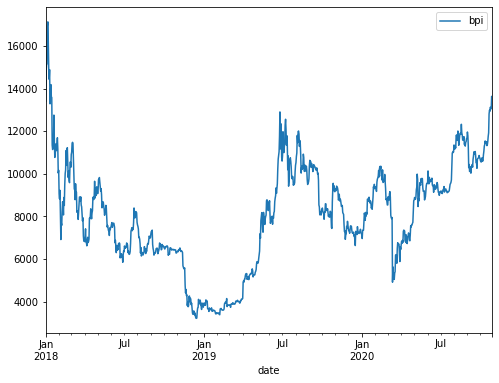

In [8]:
data.plot()

#### Function-1 (Resample)
This function helps in visualizing the data better. (but apply only when you understand the data from business perspective.  
  
D Calendar day, B Business day, W Weekly, M Month, Q Quarter, A Year end, H Hours, T Minutes, S Seconds
  
Since the data is collected everyday in this example, lets try to upsample it to monthly average and check if the trend/seasonality is captured.

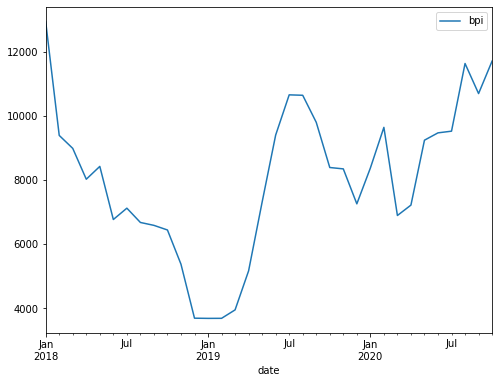

In [9]:
data.resample('M').mean().plot()

###### Insight:
    The plot is smooth, easy to understand than the previous one. It also captures the trend!

### Function -2 (diff)

This function helps in removing trend from a non-stationary series and making it a weakly stationary series. By default diff applies for 1 row difference.

In [10]:
data.diff(2)

,bpi
date,
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,1722.2113
2018-01-04,414.4700
2018-01-05,1802.5225
...,...
2020-10-24,139.1533
2020-10-25,98.9066
2020-10-26,-59.2267


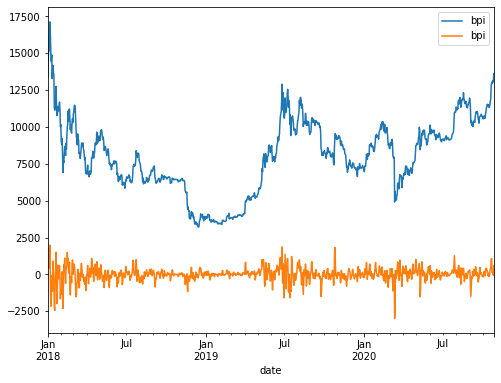

In [11]:
pd.concat([data['bpi'],data['bpi'].diff(2)], axis = 1).plot()

###### Insight:
    Orange line is diff(2) and it is weakly stationary! Now we can apply the ARIMA model for forecasting...

### Function - 3 (shift and tshift)

shift is also similar to diff... it helps in shifting the column value by <1>(default as diff).tshift helps in shifting the time(index column)

In [12]:
data[:5].shift(2)

,bpi
date,
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,13412.4400
2018-01-04,14740.7563
2018-01-05,15134.6513


In [13]:
data[:5] - data[:5].shift(2) # same as diff(2)

,bpi
date,
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,1722.2113
2018-01-04,414.4700
2018-01-05,1802.5225


In [14]:
data[:5] 

,bpi
date,
2018-01-01,13412.4400
2018-01-02,14740.7563
2018-01-03,15134.6513
2018-01-04,15155.2263
2018-01-05,16937.1738


In [15]:
data[:5].tshift() #shifts time by 1 row, retains the same bpi values!

,bpi
date,
2018-01-02,13412.4400
2018-01-03,14740.7563
2018-01-04,15134.6513
2018-01-05,15155.2263
2018-01-06,16937.1738


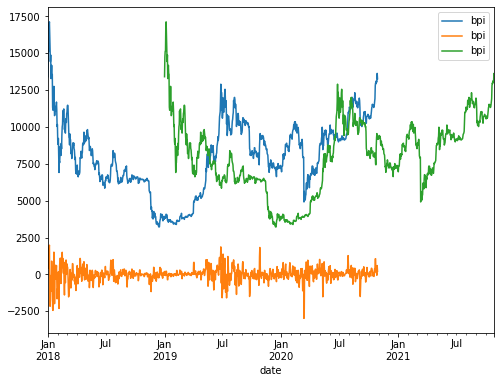

In [16]:
pd.concat([data,data - data.shift(2), data.tshift(365)], axis = 1).plot() #time shifted by a year

###### Insight:
    orange line is the shifted plot (weakly stationary, no trend), green line is the time shifted plot(by a year)

### Function - 4 (rolling)

When applying moving averages for time-series modelling, pandas builtin rolling window is used often

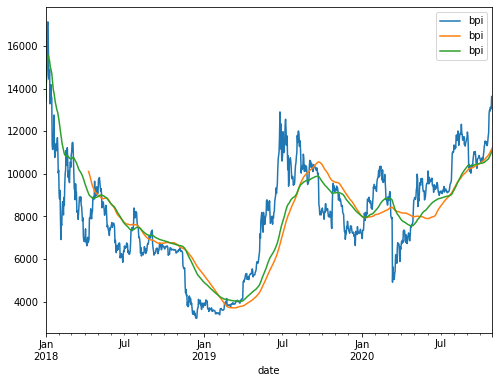

In [17]:
pd.concat([data,data.rolling(window=100).mean(), data.ewm(span=100).mean()],axis=1).plot()

###### Insight:
    Exponential weighted average(green) captures the trend faster than simple moving average(orange)!
  
It's also posible to combine different functions together. 

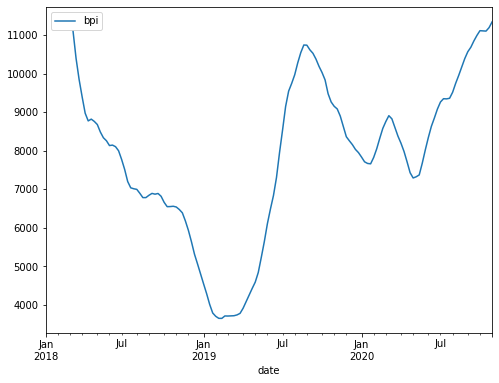

In [18]:
data.resample('W').mean().rolling(window=10).mean().plot() #weekly resample and SMA

### Generic functions using groupby

There are multiple business scenarios where the weekly or monthly or yearly (seasonality) trends might be important, in suchcases its best to group the data accordingly and visualize

In [19]:
data.groupby(data.index.month).mean() #average it over months across all years. 
# Similarly apply for each day by using data.groupby(data.index.dayofweek).mean() 

,bpi
date,
1,8329.527041
2,7597.976365
3,6611.559472
4,6804.786222
5,8326.170929
6,8546.459689
7,9099.238280
8,9648.987675
9,9025.914277


In [20]:
data.groupby(data.index.year).mean() #average it over years

,bpi
date,
2018,7529.385702
2019,7379.960562
2020,9417.717067


In [21]:
### Calculating cumulative sum to check how data moves over time!
data[:5].cumsum()

,bpi
date,
2018-01-01,13412.4400
2018-01-02,28153.1963
2018-01-03,43287.8476
2018-01-04,58443.0739
2018-01-05,75380.2477


In [22]:
### Percentage change btw rows (1 row diff by default) 
# percentage change function over a week(pct_change(7)) or month or year!
print(data[:5])
print('\nPercentage Change (default): \n')
print(data[:5].pct_change())

                   bpi
date                  
2018-01-01  13412.4400
2018-01-02  14740.7563
2018-01-03  15134.6513
2018-01-04  15155.2263
2018-01-05  16937.1738

Percentage Change (default): 

                 bpi
date                
2018-01-01       NaN
2018-01-02  0.099036
2018-01-03  0.026721
2018-01-04  0.001359
2018-01-05  0.117580
